# Sentiment Analysis with Recurrent Neural Network (RNN) Model
- RNNs can use their internal state (memory) to process sequences of inputs and thus applicable to tasks speech recognition and here sentiment classification.
- A Recurrent Neural Network (RNN) is composed of LSTM (Long Short-Term Memory) units often called an LSTM network.
- A basic Long short-term memory (LSTM) units often plot like following:(the picture is from: https://developer.nvidia.com/discover/lstm)
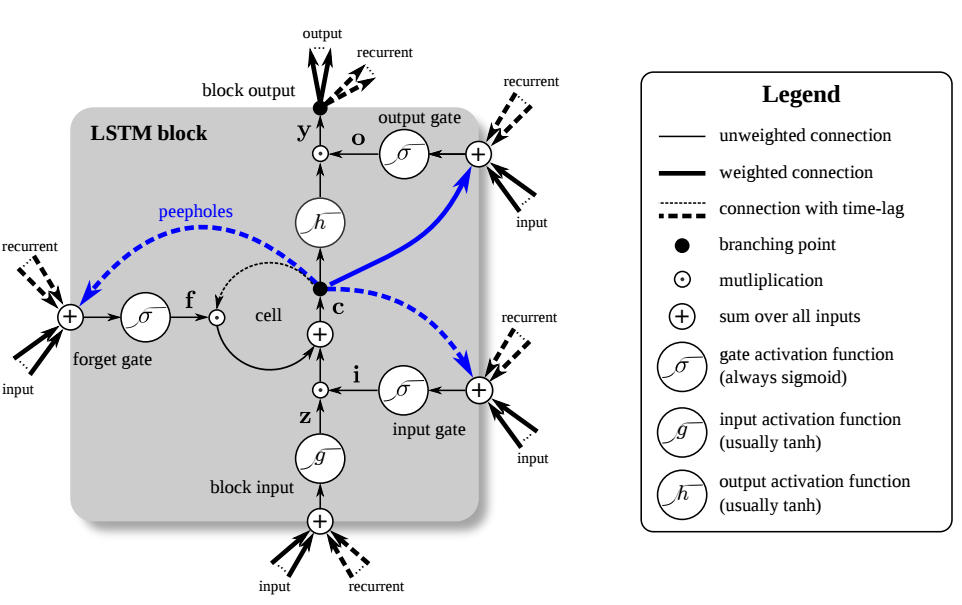
- LSTM network is capable of learning long-term dependencies. For example, one sentence starts with "The director of this moive is very famous, ". But whether or not this sentence is positive or negative depends on the following. For example, "The director of this moive is very famous, but his/her movie this time is disappointing." or "The director of this moive is very famous, I think this moive will help his/her to get Oscars."

In [1]:
# Importing the basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

## Importing the preprocessed dataset

In [2]:
data = pd.read_csv('imdb_data.csv')
data

,review,sentiment
0,one reviewers mention watch 1 oz episode youll...,positive
1,wonderful little production film technique una...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically theres family little boy jake think ...,negative
4,petter matteis love time money visually stun f...,positive
...,...,...
49995,think movie right good job wasnt creative orig...,positive
49996,bad plot bad dialogue bad act idiotic direct a...,negative
49997,catholic teach parochial elementary school nun...,negative
49998,im go disagree previous comment side maltin on...,negative


In [3]:
# Extracting list of all reviews we have in our dataset
reviews = data.review
reviews

0        one reviewers mention watch 1 oz episode youll...
1        wonderful little production film technique una...
2        think wonderful way spend time hot summer week...
3        basically theres family little boy jake think ...
4        petter matteis love time money visually stun f...
                               ...                        
49995    think movie right good job wasnt creative orig...
49996    bad plot bad dialogue bad act idiotic direct a...
49997    catholic teach parochial elementary school nun...
49998    im go disagree previous comment side maltin on...
49999    one expect star trek movies high art fan expec...
Name: review, Length: 50000, dtype: object

In [4]:
# Importing the necessary sklearn libraries
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

### Labeling the sentiment text before splitting

In [5]:
# Converting sentiments to numeric forms
lb = LabelBinarizer()

# Transformed sentiments
sentiments = lb.fit_transform(data['sentiment'])
sentiments

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

### Splitting the dataset

In [6]:
X_train_reviews, X_test_reviews, y_train_sentiments, y_test_sentiments = train_test_split(
    reviews, sentiments, test_size = 0.20, random_state = 42)

In [7]:
print(X_train_reviews)
print(y_train_sentiments)

39087    thats keep ask many fight scream match swear g...
30893    watch entire movie could watch entire movie st...
45278    touch love story reminiscent mood love draw he...
16398    latterday fulci schlocker totally abysmal conc...
13653    first firmly believe norwegian movies continua...
                               ...                        
11284    shadow magic recapture joy amazement first mov...
44732    find movie quite enjoyable fairly entertain go...
38158    avoid one terrible movie excite pointless murd...
860      production quite surprise absolutely love obsc...
15795    decent movie although little bite short time p...
Name: review, Length: 40000, dtype: object
[[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [1]]


In [8]:
print(X_test_reviews)
print(y_test_sentiments)

33553    really like summerslam due look arena curtain ...
9427     many television show appeal quite many differe...
199      film quickly get major chase scene ever increa...
12447    jane austen would definitely approve onegwynet...
39489    expectations somewhat high go see movie think ...
                               ...                        
28567    although casper van dien michael rooker genera...
25079    like movie wasnt really sure start watch enjoy...
18707    yes nonsingaporeans cant see whats big deal fi...
15200    far film go likable enough entertain character...
5857     saw anatomy years ago dub friends house dont r...
Name: review, Length: 10000, dtype: object
[[1]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]


In [9]:
# Importing the necessary Keras packages to deal with data and build neural networks
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping

## Word Embedding
We will use pre-trained embedding matrix "glove.6B.300d.txt" to accelerate our algorithms.

In [10]:
# Creating dictionary that contains all the vector representations of words in GloVe word vectors
word_to_vec_map = {}

# Creating each line in GloVe dataset as a key-value pair
with open('nnData/glove.6B.300d.txt', 'r', encoding = 'utf8') as f:
    word = set()
    for line in f:
        line = line.strip().split()
        curr_word = line[0]
        word.add(curr_word)
        word_to_vec_map[curr_word] = np.array(line[1:], dtype = np.float64)

In [11]:
# Defining a text tokenization utility class
tokenizer = Tokenizer()
tokenizer.fit_on_texts(word_to_vec_map.keys())

# Dictionary mapping from words to their indices
word_to_index = tokenizer.word_index

### Preprocessing on the Feature/Reviews Data

In [12]:
# Match the input format of the model
X_tokenized = tokenizer.texts_to_sequences(X_train_reviews)
X_tokenized = tokenizer.texts_to_sequences(X_test_reviews)

X_train = pad_sequences(X_tokenized, maxlen = 70)
X_test =  pad_sequences(X_tokenized, maxlen = 70)

In [13]:
print(X_train)
print(X_test)

[[ 6382 15604 70824 ... 13566 16867  1390]
 [ 1317  4796  2958 ...  2477  3376 21856]
 [    0     0     0 ... 19291  2853  4451]
 ...
 [17206 35547  8211 ...  6142   415   248]
 [14151   930 13617 ...   196  2856 20470]
 [21228   434  4249 ...  3376   194   154]]
[[ 6382 15604 70824 ... 13566 16867  1390]
 [ 1317  4796  2958 ...  2477  3376 21856]
 [    0     0     0 ... 19291  2853  4451]
 ...
 [17206 35547  8211 ...  6142   415   248]
 [14151   930 13617 ...   196  2856 20470]
 [21228   434  4249 ...  3376   194   154]]


### Preprocessing on the Target/Sentiment Data

In [14]:
# Changing the y_train and y_test into One-Hot representation
y_train = to_categorical(y_train_sentiments)
y_test = to_categorical(y_test_sentiments)

In [15]:
print(y_train)
print(y_test)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


## Creating the embedding matrix

In [16]:
# Size of vocabulary: # Adding '1' as index '0' is reserved in word_index
voc_len = len(word_to_index) + 1  

# Dimensionality of the GloVe word vectors
emb_dim = word_to_vec_map["a"].shape[0]
emb_dim

300

In [17]:
embedding_matrix = np.zeros((voc_len, emb_dim))

# Set each row "index" of the embedding matrix to be the word vector representation of the "index"th word of the vocabulary
for word, index in word_to_index.items():
    if word_to_vec_map.get(word) is not None:
        embedding_matrix[index, :] = word_to_vec_map[word]

## Build the RNN model based on Keras

In [18]:
# Defining Keras embedding layer with the correct output/input sizes, making it trainable.
embedding_layer = Embedding(voc_len, emb_dim, input_length = 70, trainable = False, 
                            weights = [embedding_matrix], mask_zero = True)

model = Sequential()
# Propagating the model from embedding_layer
model.add(embedding_layer)
# Propagating the embeddings through an LSTM layer
model.add(LSTM(emb_dim, activation = 'relu', return_sequences = True))
# Adding dropout with a probability of 0.2
model.add(Dropout(0.2))
# Propagating the embeddings through an LSTM layer
model.add(LSTM(emb_dim, activation = 'relu'))
# Adding dropout with a probability of 0.2
model.add(Dropout(0.2))
# Propagating X through a Dense layer with softmax activation to get back a batch of 5-dimensional vectors.
model.add(Dense(2, activation = 'softmax'))

In [19]:
# Summary of this RNN/LSTM model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 300)           101775600 
_________________________________________________________________
lstm (LSTM)                  (None, 70, 300)           721200    
_________________________________________________________________
dropout (Dropout)            (None, 70, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 602       
Total params: 103,218,602
Trainable params: 1,443,002
Non-trainable params: 101,775,600
__________________________________

## Compiling and Fitting the RNN/LSTM model

In [20]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [21]:
# Fit and estimate our Model
history = model.fit(X_train, y_train, epochs = 11, batch_size = 144, validation_split = 0.2)

Epoch 1/11
56/56 [==============================] - 69s 1s/step - loss: 0.6951 - accuracy: 0.5098 - val_loss: 0.6962 - val_accuracy: 0.4900
Epoch 2/11
56/56 [==============================] - 56s 998ms/step - loss: 0.6913 - accuracy: 0.5222 - val_loss: 0.6969 - val_accuracy: 0.4925
Epoch 3/11
56/56 [==============================] - 56s 1s/step - loss: 0.6820 - accuracy: 0.5728 - val_loss: 0.7076 - val_accuracy: 0.5090
Epoch 4/11
56/56 [==============================] - 57s 1s/step - loss: 2839665.2861 - accuracy: 0.5922 - val_loss: 11535.5605 - val_accuracy: 0.5105
Epoch 5/11
56/56 [==============================] - 63s 1s/step - loss: 150051.5848 - accuracy: 0.5122 - val_loss: 2854.2361 - val_accuracy: 0.5145
Epoch 6/11
56/56 [==============================] - 252s 5s/step - loss: 6390.6313 - accuracy: 0.5000 - val_loss: 3733.4866 - val_accuracy: 0.4960
Epoch 7/11
56/56 [==============================] - 59s 1s/step - loss: 3819.2126 - accuracy: 0.4941 - val_loss: 621.7100 - val_accu

### Evaluating the model

In [22]:
loss, acc = model.evaluate(X_test, y_test, batch_size = 144)
print('RNN/LSTM Test Accuracy: %.2f%%' % (acc * 100))

70/70 [==============================] - 11s 163ms/step - loss: 4986.7886 - accuracy: 0.4811
RNN/LSTM Test Accuracy: 48.11%


### Plotting the accuracy graphs

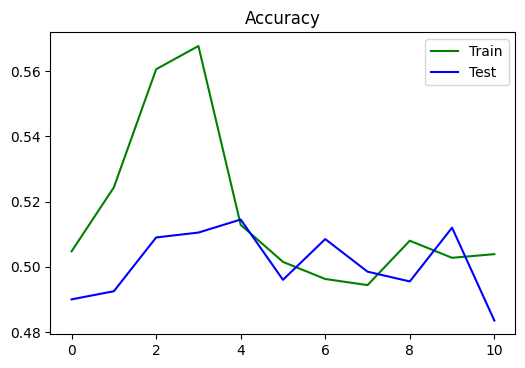

In [23]:
fig = plt.figure(dpi = 100)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color = "g", label = "Train")
plt.plot(history.history["val_accuracy"], color = "b", label = "Test")
plt.legend(loc = "best")
plt.savefig('graphs/accuracyRnn.png')

### Plotiing the loss graph

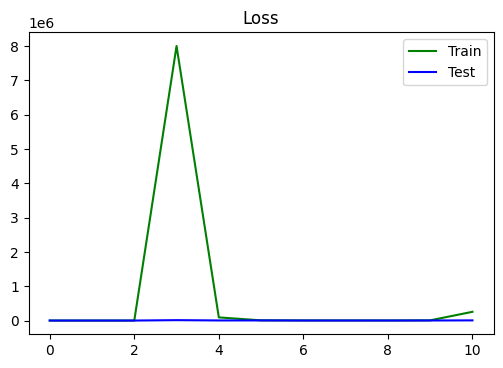

In [24]:
fig = plt.figure(dpi = 100)
plt.title("Loss")
plt.plot(history.history["loss"], color = "g", label = "Train")
plt.plot(history.history["val_loss"], color = "b", label = "Test")
plt.legend(loc = "best")
plt.savefig('graphs/lossRnn.png')